In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Without embedding features

In [3]:
train = pd.read_csv('/content/drive/My Drive/BT4012 Group 06/Data/train_non_embedded.csv', index_col=None)

In [4]:
test = pd.read_csv('/content/drive/My Drive/BT4012 Group 06/Data/test_non_embedded.csv', index_col=None)

In [5]:
X_train = train.drop('fraudulent',axis = 1)
y_train = train[['fraudulent']]
X_test = test.drop('fraudulent',axis = 1)
y_test = test[['fraudulent']]

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Accuracy: 0.9549776286353467
Precision: 0.7777777777777778
Recall: 0.15469613259668508
F1: 0.25806451612903225


In [8]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

coefficients = model.coef_
intercept = model.intercept_
feature_names = X_train.columns
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients[0]})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

print(coefficients_df)


                             Feature  Coefficient
8             department_mean_target     7.758473
60                     country_ratio     6.456927
30             num_of_verbs_benefits     2.292102
48         num_of_propns_description     1.664097
16       nouns_vs_words_requirements     1.324218
31           verbs_vs_words_benefits     1.285343
34     adjs_vs_words_company_profile     1.274499
9       num_of_nouns_company_profile     1.194633
73                   high_max_salary     1.121054
10    nouns_vs_words_company_profile     1.087017
52      propns_vs_words_requirements     1.069479
35    adjs_vs_length_company_profile     0.940541
59                country_fraudulent     0.920606
66              experience_frequency     0.901636
64         employment_type_Part-time     0.833032
18             num_of_nouns_benefits     0.807042
25        verbs_vs_words_description     0.805695
45     num_of_propns_company_profile     0.581541
5           sentiment score_benefits     0.458882


In [9]:
abs_coeff_df = coefficients_df
abs_coeff_df['Absolute Coefficient'] = abs(abs_coeff_df['Coefficient'])
abs_coeff_df = abs_coeff_df.sort_values(by='Absolute Coefficient', ascending=False)

print(abs_coeff_df)

                             Feature  Coefficient  Absolute Coefficient
8             department_mean_target     7.758473              7.758473
60                     country_ratio     6.456927              6.456927
22    verbs_vs_words_company_profile    -3.160311              3.160311
30             num_of_verbs_benefits     2.292102              2.292102
70                 min_salary_capped    -2.194328              2.194328
54            num_of_propns_benefits    -1.873741              1.873741
27         num_of_verbs_requirements    -1.838129              1.838129
24          num_of_verbs_description    -1.804956              1.804956
33       num_of_adjs_company_profile    -1.712377              1.712377
48         num_of_propns_description     1.664097              1.664097
16       nouns_vs_words_requirements     1.324218              1.324218
31           verbs_vs_words_benefits     1.285343              1.285343
34     adjs_vs_words_company_profile     1.274499              1

# With embedding features

In [10]:
combined_train = pd.read_csv('/content/drive/My Drive/BT4012 Group 06/Data/combined_train.csv', index_col=None)

In [11]:
combined_test = pd.read_csv('/content/drive/My Drive/BT4012 Group 06/Data/combined_test.csv', index_col=None)

In [12]:
feature_importance = pd.read_csv('/content/drive/My Drive/BT4012 Group 06/Data/feature_importance.csv', index_col=None)

## Top 200 features

In [13]:
top_200_features = feature_importance[0:200]

In [14]:
X_train_c = combined_train.drop('fraudulent',axis = 1)[top_200_features['Feature'].tolist()]
y_train_c = combined_train[['fraudulent']]
X_test_c = combined_test.drop('fraudulent',axis = 1)[top_200_features['Feature'].tolist()]
y_test_c = combined_test[['fraudulent']]

In [15]:
# Calculate the correlation between each feature and the target
correlation_with_target = X_train_c.apply(lambda col: col.corr(y_train_c['fraudulent']))
correlation_df = pd.DataFrame(list(correlation_with_target.items()), columns=['Feature', 'Correlation'])
correlation_df['abs_correlation'] = correlation_df['Correlation'].abs()
# Sort the DataFrame by correlation values in descending order
correlation_df = correlation_df.sort_values(by='abs_correlation', ascending=False)

In [16]:
X_train_c = combined_train.drop('fraudulent',axis = 1)[correlation_df[0:200]['Feature'].tolist()]
y_train_c = combined_train[['fraudulent']]
X_test_c = combined_test.drop('fraudulent',axis = 1)[correlation_df[0:200]['Feature'].tolist()]
y_test_c = combined_test[['fraudulent']]

In [17]:
model_c = LogisticRegression()
model_c.fit(X_train_c, y_train_c)
y_pred_c = model_c.predict(X_test_c)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
accuracy = accuracy_score(y_test_c, y_pred_c)
precision = precision_score(y_test_c, y_pred_c)
recall = recall_score(y_test_c, y_pred_c)
f1 = f1_score(y_test_c, y_pred_c)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Accuracy: 0.9546979865771812
Precision: 0.7714285714285715
Recall: 0.14917127071823205
F1: 0.25


## Top 100 features

In [19]:
top_100_features = feature_importance[0:100]

In [20]:
X_train_c = combined_train.drop('fraudulent',axis = 1)[top_100_features['Feature'].tolist()]
y_train_c = combined_train[['fraudulent']]
X_test_c = combined_test.drop('fraudulent',axis = 1)[top_100_features['Feature'].tolist()]
y_test_c = combined_test[['fraudulent']]

In [21]:
# Calculate the correlation between each feature and the target
correlation_with_target = X_train_c.apply(lambda col: col.corr(y_train_c['fraudulent']))
correlation_df = pd.DataFrame(list(correlation_with_target.items()), columns=['Feature', 'Correlation'])
correlation_df['abs_correlation'] = correlation_df['Correlation'].abs()
# Sort the DataFrame by correlation values in descending order
correlation_df = correlation_df.sort_values(by='abs_correlation', ascending=False)

In [22]:
X_train_c = combined_train.drop('fraudulent',axis = 1)[correlation_df[0:100]['Feature'].tolist()]
y_train_c = combined_train[['fraudulent']]
X_test_c = combined_test.drop('fraudulent',axis = 1)[correlation_df[0:100]['Feature'].tolist()]
y_test_c = combined_test[['fraudulent']]

In [23]:
model_c = LogisticRegression()
model_c.fit(X_train_c, y_train_c)
y_pred_c = model_c.predict(X_test_c)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
accuracy = accuracy_score(y_test_c, y_pred_c)
precision = precision_score(y_test_c, y_pred_c)
recall = recall_score(y_test_c, y_pred_c)
f1 = f1_score(y_test_c, y_pred_c)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Accuracy: 0.9549776286353467
Precision: 0.7777777777777778
Recall: 0.15469613259668508
F1: 0.25806451612903225


## Top 50 features

In [25]:
top_50_features = feature_importance[0:50]

In [26]:
X_train_c = combined_train.drop('fraudulent',axis = 1)[top_50_features['Feature'].tolist()]
y_train_c = combined_train[['fraudulent']]
X_test_c = combined_test.drop('fraudulent',axis = 1)[top_50_features['Feature'].tolist()]
y_test_c = combined_test[['fraudulent']]

In [27]:
# Calculate the correlation between each feature and the target
correlation_with_target = X_train_c.apply(lambda col: col.corr(y_train_c['fraudulent']))
correlation_df = pd.DataFrame(list(correlation_with_target.items()), columns=['Feature', 'Correlation'])
correlation_df['abs_correlation'] = correlation_df['Correlation'].abs()
# Sort the DataFrame by correlation values in descending order
correlation_df = correlation_df.sort_values(by='abs_correlation', ascending=False)

In [28]:
X_train_c = combined_train.drop('fraudulent',axis = 1)[correlation_df[0:50]['Feature'].tolist()]
y_train_c = combined_train[['fraudulent']]
X_test_c = combined_test.drop('fraudulent',axis = 1)[correlation_df[0:50]['Feature'].tolist()]
y_test_c = combined_test[['fraudulent']]

In [29]:
model_c = LogisticRegression()
model_c.fit(X_train_c, y_train_c)
y_pred_c = model_c.predict(X_test_c)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
accuracy = accuracy_score(y_test_c, y_pred_c)
precision = precision_score(y_test_c, y_pred_c)
recall = recall_score(y_test_c, y_pred_c)
f1 = f1_score(y_test_c, y_pred_c)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Accuracy: 0.9552572706935123
Precision: 0.8
Recall: 0.15469613259668508
F1: 0.25925925925925924


# PCA
## for non-embedding features

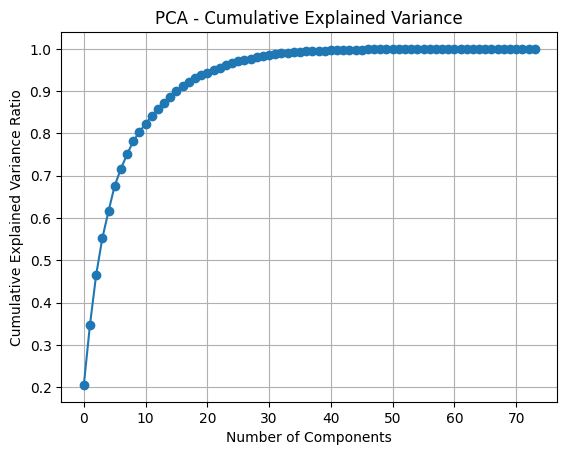

In [47]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [48]:
num_components = 50
pca = PCA(n_components=num_components)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)


Explained Variance Ratio: [2.05349195e-01 1.42761751e-01 1.17916434e-01 8.66447070e-02
 6.37848525e-02 6.00897442e-02 3.99626668e-02 3.42177729e-02
 3.07499141e-02 2.21574970e-02 1.96694021e-02 1.76292480e-02
 1.71194495e-02 1.50093529e-02 1.38939329e-02 1.31641380e-02
 1.19592237e-02 9.96053867e-03 8.55075949e-03 6.86958607e-03
 6.38387579e-03 6.19502161e-03 5.93422635e-03 5.05061450e-03
 4.80839330e-03 4.43690304e-03 3.51915248e-03 3.41848801e-03
 2.96275062e-03 2.50409796e-03 2.32755487e-03 2.25843710e-03
 1.92776556e-03 1.60715903e-03 1.39809884e-03 1.03346190e-03
 7.24062141e-04 7.05435968e-04 6.80126246e-04 5.97053407e-04
 5.82329571e-04 5.14178151e-04 3.67681801e-04 3.58315647e-04
 3.30271830e-04 2.98223577e-04 2.73784314e-04 2.58507623e-04
 2.10183658e-04 2.00059772e-04]


In [49]:
logreg = LogisticRegression()
logreg.fit(X_train_pca, y_train)
y_pred_pca = logreg.predict(X_test_pca)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
accuracy = accuracy_score(y_test, y_pred_pca)
precision = precision_score(y_test, y_pred_pca)
recall = recall_score(y_test, y_pred_pca)
f1 = f1_score(y_test, y_pred_pca)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Accuracy: 0.9549776286353467
Precision: 0.7777777777777778
Recall: 0.15469613259668508
F1: 0.25806451612903225


## for embedding features (top 50 features)

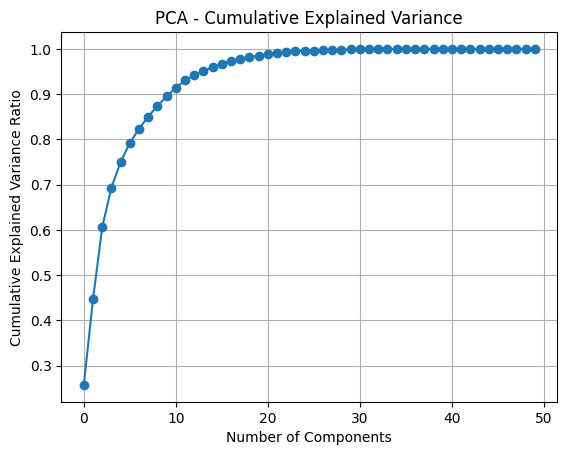

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

pca_c = PCA()
X_train_c_pca = pca_c.fit_transform(X_train_c)

cumulative_variance_ratio = np.cumsum(pca_c.explained_variance_ratio_)

plt.plot(cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [55]:
num_components = 30
pca_c = PCA(n_components=num_components)

X_train_c_pca = pca_c.fit_transform(X_train_c)
X_test_c_pca = pca_c.transform(X_test_c)

explained_variance_ratio = pca_c.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)


Explained Variance Ratio: [0.25719016 0.1900528  0.15843554 0.08777675 0.05662648 0.04215071
 0.0311441  0.02696019 0.02372119 0.0211473  0.01897058 0.01643205
 0.01156953 0.00920113 0.00810988 0.00691143 0.00655972 0.00470118
 0.003803   0.00379902 0.00314392 0.00259656 0.00216467 0.00132945
 0.0009996  0.0009708  0.0008032  0.00071588 0.00046015 0.00038533]


In [56]:
logreg_c = LogisticRegression()
logreg_c.fit(X_train_c_pca, y_train_c)
y_pred_c_pca = logreg_c.predict(X_test_c_pca)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
accuracy = accuracy_score(y_test_c, y_pred_c_pca)
precision = precision_score(y_test_c, y_pred_c_pca)
recall = recall_score(y_test_c, y_pred_c_pca)
f1 = f1_score(y_test_c, y_pred_c_pca)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Accuracy: 0.9552572706935123
Precision: 0.8
Recall: 0.15469613259668508
F1: 0.25925925925925924
